In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
# fortuneTeller_df

In [2]:
prophet_df = pd.read_csv('Production Companies and Profit Data.csv')

In [3]:
prophet_df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
prophet_df['release_date'] = pd.to_datetime(prophet_df.release_date)

In [5]:
prophet_df.sort_values(by='release_date', ascending=False, inplace=True)

In [7]:
prophet_df.tail()

,budget,original_language,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,...,Bottom Line Entertainment,GFA Entertainment,Beijing Sparkle Roll Media Corporation,SITE Productions,Artemis Film,Telenet,Benderspink,Shark Island Productions,Taylor Lane Productions,Hawthorn Productions
1805,1644736,en,You Can't Take It with You,10.795,1938-09-01,7433101,126.0,You Can't Take It with You,7.5,198,...,0,0,0,0,0,0,0,0,0,0
254,1488423,en,Snow White and the Seven Dwarfs,36.443,1937-12-21,184925486,83.0,Snow White and the Seven Dwarfs,7.1,5324,...,0,0,0,0,0,0,0,0,0,0
1353,1500000,en,City Lights,13.404,1931-02-01,19181,87.0,City Lights,8.4,1260,...,0,0,0,0,0,0,0,0,0,0
1811,18000,de,Das Cabinet des Dr. Caligari,10.772,1920-02-27,8811,77.0,The Cabinet of Dr. Caligari,7.9,833,...,0,0,0,0,0,0,0,0,0,0
1475,8394751,en,Intolerance: Love's Struggle Throughout the Ages,12.662,1916-09-04,4000000,197.0,Intolerance: Love's Struggle Throughout the Ages,7.3,180,...,0,0,0,0,0,0,0,0,0,0


In [6]:
pd.options.display.max_columns = None

In [7]:
# Let's do some trimming - these movies go back to 1916 and are not adjusted for inflation
# Narrowing the search for movies released in the timeframe 2015-2020 will provide more relevant results
start_date = '2015-01-01'
end_date = '2020-12-31'
modernization_machine = (prophet_df['release_date'] >= start_date) & (prophet_df['release_date'] <= end_date)

In [8]:
# Slimming the prophets
prophet_df = prophet_df.loc[modernization_machine]
prophet_df.tail()

,budget,original_language,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit,Arcadia,KOJO Entertainment,Elevate Production Finance,Futurism Studios,Rocketboy,Nadie es Perfecto,Oriah Entertainment,Sony Pictures Television,Half Circle,The Donners' Company,Zed Filmworks,Project 8 Films,Daemyung Culture Factory,Doosaboo Film,Zipfelmützen GmbH & Co. KG,TSJ Entertainment,Fidélité Films,Raven West Films,Paper Kite Productions,William Dozier Productions,CNC,La Sienega Productions,TV Tokyo Corporation,Brouwersgracht Investments,Union Film Company,Birnbaum / Barber Productions,Rollins-Joffe Productions,Videocine S.A. de C.V.,MavroCine Pictures GmbH & Co. KG,Dong Woo Animation,ITNDDTD,NHK,Rhombus Media,Daniel H. Birman Productions,Williams Street,Corn Cobb Productions,New Visions Pictures,TS Entertainment,Pathé Overseas,G.W. Films,Enbankment Films,Buena Vista International,Screen Arcade,Theobald Film Productions,DreamWorks Pictures,Brass Hat Films,Primate Pictures,Camelot Entertainment Group,Hacker Productions,Pan Productions,ITV,Rio Negro,Film Constellation,TNT,Pathé Entertainment,Throne Productions,One Two Films,Paris Film,Cinelamda Internationale Filmproduktionsgesellschaft,Las Producciones del Escorpión S.L.,Always Split Aces Productions,Ikaria,CCRE,Whitest Pouring Films,Walt Disney Pictures,Hal Lieberman Company,Hollywood Licensing Group,Seven Bucks Productions,EM Media,Fünfte Babelsberg Film,Monkey Pack Films,Roserock Films,Slap Happy Productions (II),The Public Theatre,ON Animation Studios,Inkjet Productions,Sammy,Fulcrum Media Finance,Samuel Bronston Productions,Dagger Films,PVR Pictures,Amalgamated Film Enterprises,Downtown Community Television Center,Sighvatsson Films,Pulse Films,On the Day,Optix Digital Pictures,Televisa Cine,SRG SSR,Columbus Circle Films,Augusto,CatchPlay,"Wang Film Productions Co., Ltd.",The Bridge Production,Light Song Films,A Plus Image 4,Sociedad General de Cine S.A.,Spanglish Media,Breakthru Films,Oma Inge Film,Huoerguosi Bona Culture and Media,Avantdrive,CinemaNX,Blue Lake Media Fund,Miraj Films,Pathé Distribution,Ad Hominem Enterprises,Esselte Video,Action Brand,Wanda Media Co.,Tony-Seven Films,Liaison Films,Big Cat Productions,"Wollman Productions, LLC",GMM Tai Hub (GTH),Arcade Pictures,Defiance Productions,LightHouse Films,Région Hauts-de-France,Island Film Group,Life's a Beach Entertainment,Robert Simonds Productions,EiTB,21 Laps Entertainment,Broad Green Pictures,Mile High Productions,Revolution Studios,Sacem,TinRes Entertainment,Epsilon Motion Pictures,Atresmedia,Wattpad,Petra Cinematografica,Chaintron,Farraday Films,Sixteen Films,Unanimous Pictures,Vendôme Production,Schønne Film,Ludlum Entertainment,Pet Fly Productions,The Caddo Company,HT Film,Trinity Media Financing,12 Gauge Productions,Commotion Pictures,Winkler Films,Imagine Entertainment,Point.360,KNM Films,Dynamic Effects Canada,Viz Media,Killing Link Productions,Smudge Films,Art In Motion,Barrow Group,The Dilbar Syndicate,Conquering Lion Pictures,Interstar,Stoller Global Solutions,K-O Paper Products (US),BR Petrobrás,What to Expect Productions,Twin Bros. Productions,NordicStories AS,Ella Communications,STUDIO PONOC,LBI Media,Cedar Park Entertainment,Irish Film Industry,Benetone Hillin Entertainment,852 Films,Evoke,Point Blank Productions,Deep River Productions,Constantin Film,La Classe Américaine,Lion Films,Kismet Entertainment Group,Yari Film Group (YFG),Charenton Productions Limited,Raw Feed,DNA Productions,Aronnax Animation Studios,Sumitomo Corporation,Transmission Pictures,BBC Worldwide France,Empire Pictures,Fragile Films,Den Vestdanske Filmpulje,Magnolia Hill Productions,Brandywine Productions,Simar Films,CineTel Films,K/W Productions,Block 2 Pictures,Searchlight Pictures,Attitude Pinículas y Films A.I.E.,Kinodel,Underground Producciones,Noruz Films (I),Radical Studios,Forrest Films,WideAwake,RMA Productions,Green Hills Productions,Mainline Pictures,Old Bull Pictures,Mediajuice Studios,

In [12]:
# The Danish Girl made the cut!
# Let's see how many results we're left with
# 405 huh. Well, let's see how they look
prophet_df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [9]:
# Slicing production companies only
companies_only = prophet_df.loc[:,'Arcadia':]

In [10]:
# List of column values
prophet_df_cols = list(companies_only.columns.values)
prophet_df_cols

['Arcadia',
 'KOJO Entertainment',
 'Elevate Production Finance',
 'Futurism Studios',
 'Rocketboy',
 'Nadie es Perfecto',
 'Oriah Entertainment',
 'Sony Pictures Television',
 'Half Circle',
 "The Donners' Company",
 'Zed Filmworks',
 'Project 8 Films',
 'Daemyung Culture Factory',
 'Doosaboo Film',
 'Zipfelmützen GmbH & Co. KG',
 'TSJ Entertainment',
 'Fidélité Films',
 'Raven West Films',
 'Paper Kite Productions',
 'William Dozier Productions',
 'CNC',
 'La Sienega Productions',
 'TV Tokyo Corporation',
 'Brouwersgracht Investments',
 'Union Film Company',
 'Birnbaum / Barber Productions',
 'Rollins-Joffe Productions',
 'Videocine S.A. de C.V.',
 'MavroCine Pictures GmbH & Co. KG',
 'Dong Woo Animation',
 'ITNDDTD',
 'NHK',
 'Rhombus Media',
 'Daniel H. Birman Productions',
 'Williams Street',
 'Corn Cobb Productions',
 'New Visions Pictures',
 'TS Entertainment',
 'Pathé Overseas',
 'G.W. Films',
 'Enbankment Films',
 'Buena Vista International',
 'Screen Arcade',
 'Theobald Film 

In [13]:
# Create a dictionary where the loop will store results of loop
slim_prophets_dict = {}
for c in prophet_df_cols:
    # Filter dataframe for only films that are backed by production companies in the list
    propheteer_df = prophet_df[prophet_df[c] == 1]
    slim_prophets_dict[c] = propheteer_df['gross_profit'].sum()

In [14]:
len(slim_prophets_dict)

9675

In [15]:
list(slim_prophets_dict.items())

[('Arcadia', 0),
 ('KOJO Entertainment', 0),
 ('Elevate Production Finance', 0),
 ('Futurism Studios', 0),
 ('Rocketboy', 0),
 ('Nadie es Perfecto', 0),
 ('Oriah Entertainment', 0),
 ('Sony Pictures Television', 0),
 ('Half Circle', -97277),
 ("The Donners' Company", 365934787),
 ('Zed Filmworks', 0),
 ('Project 8 Films', 0),
 ('Daemyung Culture Factory', 0),
 ('Doosaboo Film', 0),
 ('Zipfelmützen GmbH & Co. KG', 0),
 ('TSJ Entertainment', 0),
 ('Fidélité Films', 0),
 ('Raven West Films', 0),
 ('Paper Kite Productions', 0),
 ('William Dozier Productions', 0),
 ('CNC', 11656193),
 ('La Sienega Productions', 0),
 ('TV Tokyo Corporation', 0),
 ('Brouwersgracht Investments', 0),
 ('Union Film Company', 0),
 ('Birnbaum / Barber Productions', 0),
 ('Rollins-Joffe Productions', 0),
 ('Videocine S.A. de C.V.', 0),
 ('MavroCine Pictures GmbH & Co. KG', 0),
 ('Dong Woo Animation', 0),
 ('ITNDDTD', 0),
 ('NHK', 0),
 ('Rhombus Media', 0),
 ('Daniel H. Birman Productions', 0),
 ('Williams Street', 

In [16]:
fortuneTeller_df = pd.DataFrame(list(slim_prophets_dict.items()), 
                                columns= ['production_companies', 'gross_profits']).sort_values(by='gross_profits', ascending = False).set_index('production_companies')


In [17]:
fortuneTeller_df

,gross_profits
production_companies,
Universal Pictures,9612645723
Walt Disney Pictures,6813709823
Warner Bros. Pictures,6050644208
Marvel Studios,5332017192
DENTSU,4468979709
...,...
DCS,-63587851
CB Films,-63587851
Belga Productions,-63587851


In [19]:
# Take the top 20 production company earners
slimFortuneTeller_df = fortuneTeller_df.iloc[:20, :]
slimFortuneTeller_df.describe()
# To the 9th is equivalent to 10s of millions (i.e. 38,774,491)

,gross_profits
count,2.000000e+01
mean,3.877491e+09
std,1.841864e+09
min,2.200550e+09
25%,2.731049e+09
50%,3.402133e+09
75%,4.108390e+09
max,9.612646e+09


''

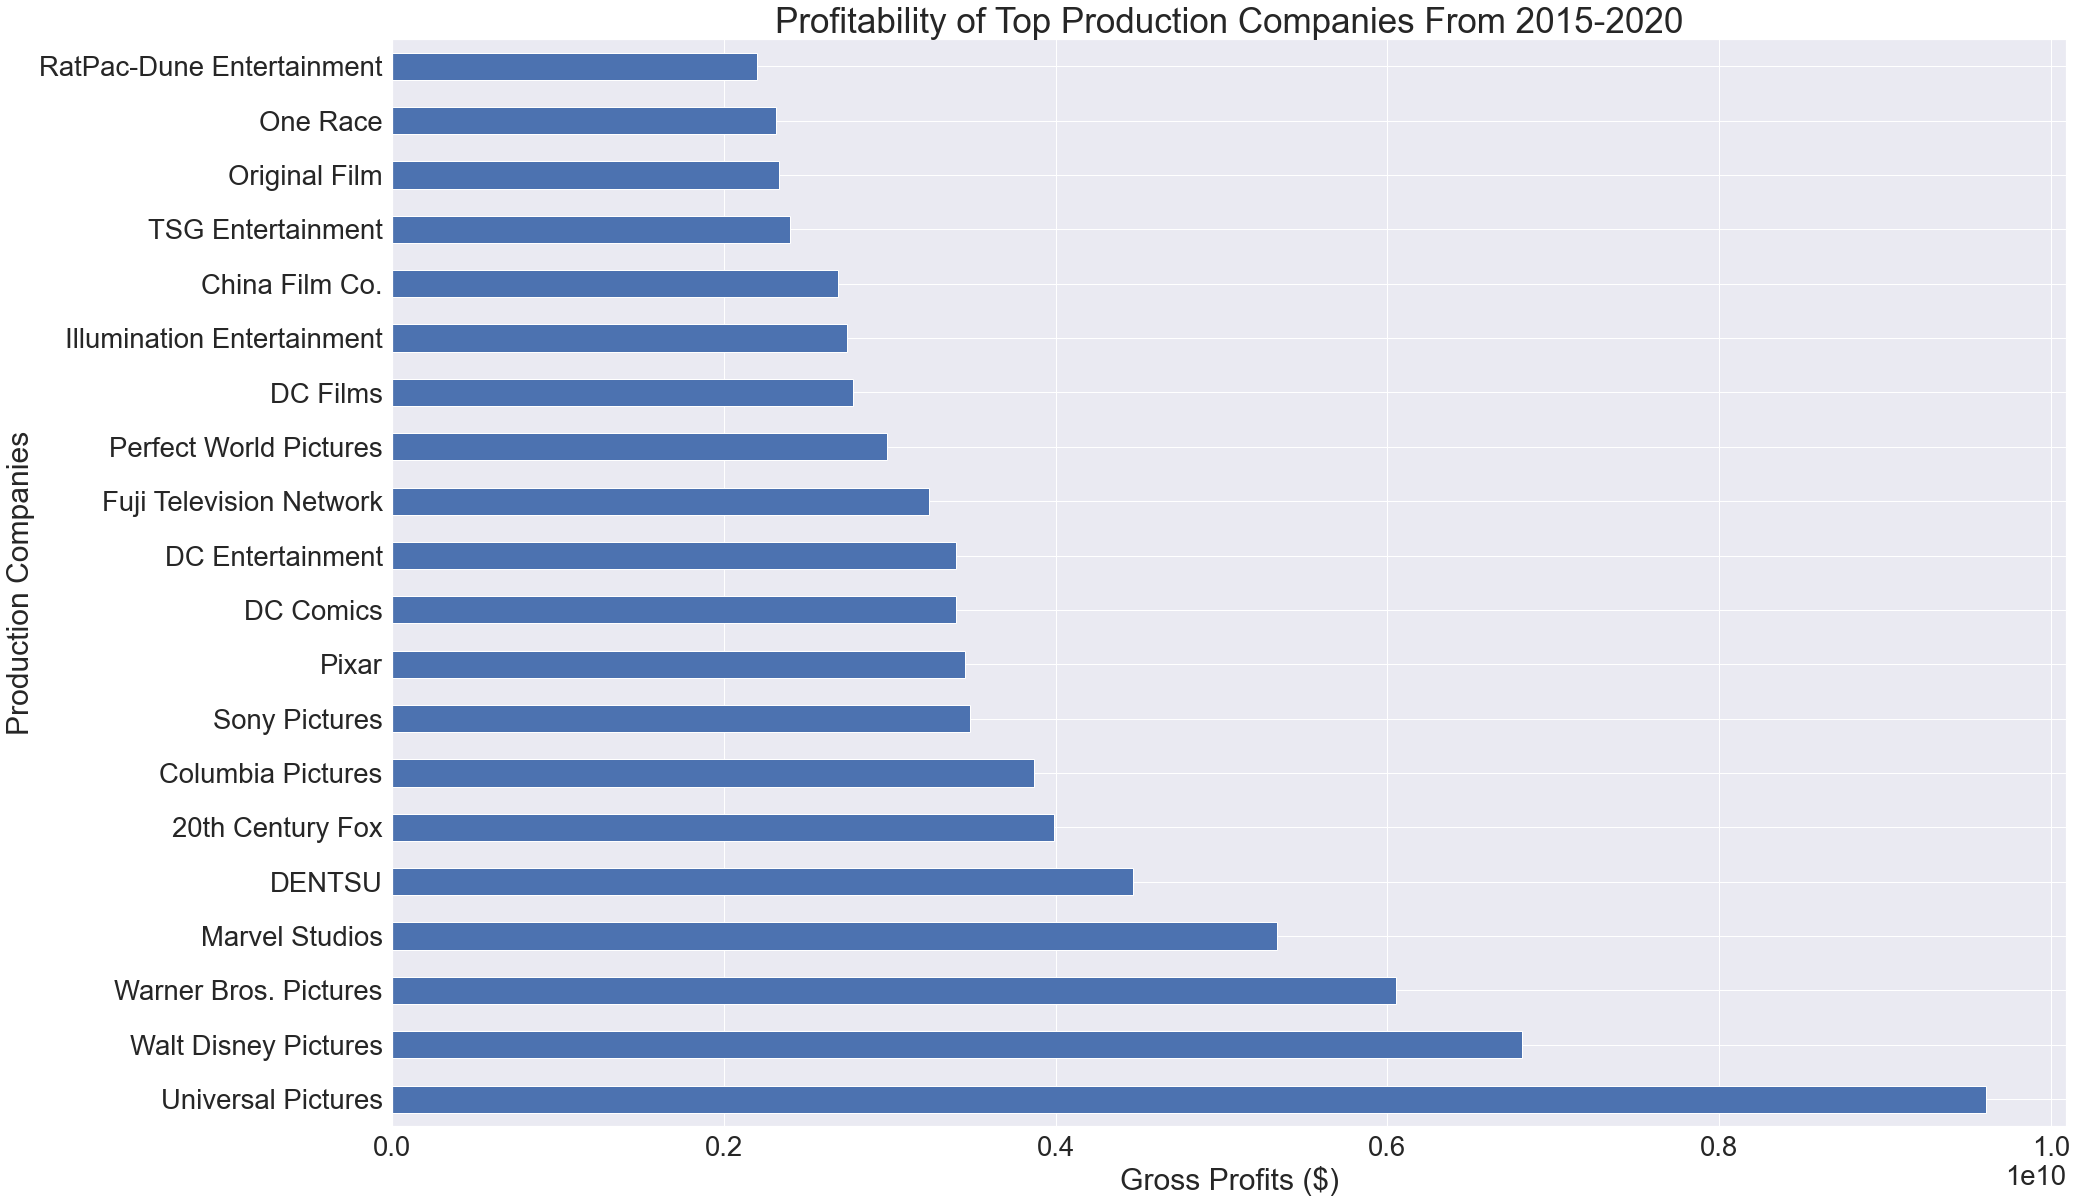

In [66]:
fig,ax = plt.subplots()
sns.set(font_scale=2.5)
slimFortuneTeller_df.plot(kind='barh', figsize = (30,20), ax=ax)
ax.set_title('Profitability of Top Production Companies From 2015-2020', fontsize=35)
ax.legend().remove()
ax.set(xlabel='Gross Profits ($)', ylabel='Production Companies');

In [30]:
slimFortuneTeller_df

,gross_profits
production_companies,
Universal Pictures,9612645723
Walt Disney Pictures,6813709823
Warner Bros. Pictures,6050644208
Marvel Studios,5332017192
DENTSU,4468979709
20th Century Fox,3988193466
Columbia Pictures,3869775520
Sony Pictures,3481333614
Pixar,3455685946


In [ ]:
fig = px.bar(data_canada, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)

In [46]:
fig = px.bar(slimFortuneTeller_df,
             labels={'production_companies': 'Production Companies', 'value':'Gross Profits ($)'})
fig.update_layout(title='Profitability of Production Companies - Years 2015-2020',
                  showlegend=False)
fig.update_traces(marker_color='rgb(0,204,125)')
fig.show()